In [256]:
import os
import argparse
import time
import random
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error as MSE


In [257]:
# Insert other imports


import warnings
warnings.filterwarnings("ignore")


In [258]:
data = pd.read_csv("train.csv")

In [259]:
data.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [260]:
data.shape

(21263, 82)

In [261]:
data.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [262]:
data.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [264]:
data[["number_of_elements"]].median()

number_of_elements    4.0
dtype: float64

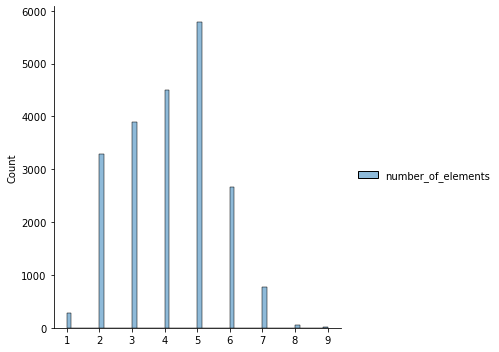

In [265]:
sns.displot(data[["number_of_elements"]])

In [266]:
#sns.lineplot(x=data[["number_of_elements"]],y=data[["critical_temp"]])



<AxesSubplot:xlabel='mean_atomic_mass', ylabel='critical_temp'>

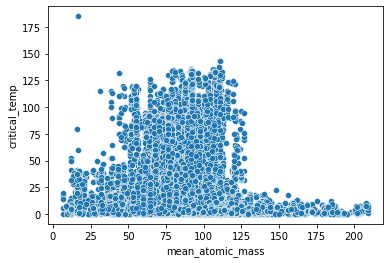

In [267]:
sns.scatterplot(x=data["mean_atomic_mass"],y=data["critical_temp"])

<AxesSubplot:xlabel='wtd_mean_atomic_mass', ylabel='critical_temp'>

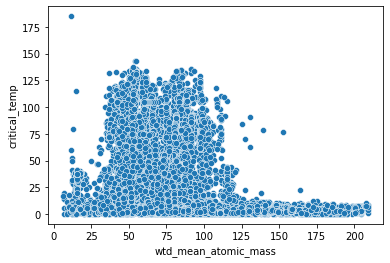

In [268]:
sns.scatterplot(x=data["wtd_mean_atomic_mass"],y=data["critical_temp"])


In [269]:
print(data.columns)

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [270]:
feature_data = {}

from scipy.stats import pearsonr

atomic_mass_columns = ['mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass']

feature_data["atomic_mass"] = []
for column in atomic_mass_columns:
    corr,_ =pearsonr(data[column],data["critical_temp"])
    print(f"Pearson coefficient for columns {column}: {corr}")
    feature_data["atomic_mass"].append(corr)
    # sns.scatterplot(x=data[column],y=data["critical_temp"])
    # plt.scatter(x=data[column],y=data["critical_temp"])
    # plt.figure()

Pearson coefficient for columns mean_atomic_mass: -0.11352324633313907
Pearson coefficient for columns wtd_mean_atomic_mass: -0.3122720196393121
Pearson coefficient for columns gmean_atomic_mass: -0.23034537452914436
Pearson coefficient for columns wtd_gmean_atomic_mass: -0.3698583846793366
Pearson coefficient for columns entropy_atomic_mass: 0.5436194092285047
Pearson coefficient for columns wtd_entropy_atomic_mass: 0.6269304016930818
Pearson coefficient for columns range_atomic_mass: 0.4919698113433388
Pearson coefficient for columns wtd_range_atomic_mass: -0.3371313852209333
Pearson coefficient for columns std_atomic_mass: 0.37876582811018233
Pearson coefficient for columns wtd_std_atomic_mass: 0.3593061612369599


In [271]:
fie_columns = ['mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie']

feature_data["fie"]= []
for column in fie_columns:
    corr,_ =pearsonr(data[column],data["critical_temp"])
    print(f"Pearson coefficient for columns {column}: {corr}")
    feature_data["fie"].append(corr)

Pearson coefficient for columns mean_fie: 0.10226805438598213
Pearson coefficient for columns wtd_mean_fie: 0.3987963680731189
Pearson coefficient for columns gmean_fie: -0.02510324887267522
Pearson coefficient for columns wtd_gmean_fie: 0.3437465704535596
Pearson coefficient for columns entropy_fie: 0.5678169384811445
Pearson coefficient for columns wtd_entropy_fie: 0.3883590475201136
Pearson coefficient for columns range_fie: 0.6007903800812826
Pearson coefficient for columns wtd_range_fie: 0.300482448568707
Pearson coefficient for columns std_fie: 0.5418038101921657
Pearson coefficient for columns wtd_std_fie: 0.5820132554394736


In [272]:
atomic_radius_columns = ['mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius']

feature_data["atomic_radius"]=[]
for column in atomic_radius_columns:
    corr,_ =pearsonr(data[column],data["critical_temp"])
    print(f"Pearson coefficient for columns {column}: {corr}")
    feature_data["atomic_radius"].append(corr)

Pearson coefficient for columns mean_atomic_radius: 0.10527268751093015
Pearson coefficient for columns wtd_mean_atomic_radius: -0.29727211775915297
Pearson coefficient for columns gmean_atomic_radius: -0.14377022135234324
Pearson coefficient for columns wtd_gmean_atomic_radius: -0.40517561130582347
Pearson coefficient for columns entropy_atomic_radius: 0.5589374384154044
Pearson coefficient for columns wtd_entropy_atomic_radius: 0.6034939833331917
Pearson coefficient for columns range_atomic_radius: 0.6537590446423334
Pearson coefficient for columns wtd_range_atomic_radius: -0.34409981243105564
Pearson coefficient for columns std_atomic_radius: 0.5596285739605887
Pearson coefficient for columns wtd_std_atomic_radius: 0.5991986591462267


In [273]:
density_columns = ['mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density']

feature_data["density"]=[]
for column in density_columns:
    corr,_ =pearsonr(data[column],data["critical_temp"])
    print(f"Pearson coefficient for columns {column}: {corr}")
    feature_data["density"].append(corr)

Pearson coefficient for columns mean_Density: -0.3682618228541595
Pearson coefficient for columns wtd_mean_Density: -0.43393963205436487
Pearson coefficient for columns gmean_Density: -0.5416844072618783
Pearson coefficient for columns wtd_gmean_Density: -0.5400455874514387
Pearson coefficient for columns entropy_Density: 0.4571693927377705
Pearson coefficient for columns wtd_entropy_Density: 0.4001901127099896
Pearson coefficient for columns range_Density: 0.26053561504080963
Pearson coefficient for columns wtd_range_Density: -0.2847293734305603
Pearson coefficient for columns std_Density: 0.11524262836497925
Pearson coefficient for columns wtd_std_Density: 0.20766315281993286


In [274]:
electron_affinity_columns = ['mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'range_ElectronAffinity', 'wtd_range_ElectronAffinity',
       'std_ElectronAffinity', 'wtd_std_ElectronAffinity']

feature_data["electron_affinity"]=[]
for column in electron_affinity_columns:
    corr,_ =pearsonr(data[column],data["critical_temp"])
    print(f"Pearson coefficient for columns {column}: {corr}")
    feature_data["electron_affinity"].append(corr)


Pearson coefficient for columns mean_ElectronAffinity: -0.19355049204629957
Pearson coefficient for columns wtd_mean_ElectronAffinity: 0.11151585425245863
Pearson coefficient for columns gmean_ElectronAffinity: -0.38056774989910136
Pearson coefficient for columns wtd_gmean_ElectronAffinity: -0.10735928859018627
Pearson coefficient for columns entropy_ElectronAffinity: 0.43720681287943286
Pearson coefficient for columns wtd_entropy_ElectronAffinity: 0.23764782377784255
Pearson coefficient for columns range_ElectronAffinity: 0.2797045470532333
Pearson coefficient for columns wtd_range_ElectronAffinity: 0.18534848947434152
Pearson coefficient for columns std_ElectronAffinity: 0.26210347849175647
Pearson coefficient for columns wtd_std_ElectronAffinity: 0.3151473401424797


In [275]:
fusionheat_columns = ['mean_FusionHeat',
       'wtd_mean_FusionHeat', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat',
       'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'range_FusionHeat',
       'wtd_range_FusionHeat', 'std_FusionHeat', 'wtd_std_FusionHeat']

feature_data["fusionheat"]=[]
for column in fusionheat_columns:
    corr,_ =pearsonr(data[column],data["critical_temp"])
    print(f"Pearson coefficient for columns {column}: {corr}")
    feature_data["fusionheat"].append(corr)


Pearson coefficient for columns mean_FusionHeat: -0.385509258921683
Pearson coefficient for columns wtd_mean_FusionHeat: -0.3941169423005117
Pearson coefficient for columns gmean_FusionHeat: -0.43179461163358757
Pearson coefficient for columns wtd_gmean_FusionHeat: -0.4323645099585996
Pearson coefficient for columns entropy_FusionHeat: 0.5527087051788914
Pearson coefficient for columns wtd_entropy_FusionHeat: 0.5632442680994015
Pearson coefficient for columns range_FusionHeat: -0.1407136882643313
Pearson coefficient for columns wtd_range_FusionHeat: -0.314178479150094
Pearson coefficient for columns std_FusionHeat: -0.20131005869157576
Pearson coefficient for columns wtd_std_FusionHeat: -0.1955711670167971


In [276]:
thermal_conductivity_columns = ['mean_ThermalConductivity', 'wtd_mean_ThermalConductivity',
       'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity',
       'range_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'std_ThermalConductivity', 'wtd_std_ThermalConductivity']

feature_data["thermal_conductivity"]=[]
for column in thermal_conductivity_columns:
    corr,_ =pearsonr(data[column],data["critical_temp"])
    print(f"Pearson coefficient for columns {column}: {corr}")
    feature_data["thermal_conductivity"].append(corr)


Pearson coefficient for columns mean_ThermalConductivity: 0.37581285747043613
Pearson coefficient for columns wtd_mean_ThermalConductivity: 0.3793360570468778
Pearson coefficient for columns gmean_ThermalConductivity: -0.3871923079828384
Pearson coefficient for columns wtd_gmean_ThermalConductivity: -0.3716014549421869
Pearson coefficient for columns entropy_ThermalConductivity: 0.08586207370989875
Pearson coefficient for columns wtd_entropy_ThermalConductivity: -0.1167275880574154
Pearson coefficient for columns range_ThermalConductivity: 0.6876539119499001
Pearson coefficient for columns wtd_range_ThermalConductivity: 0.46957158212025246
Pearson coefficient for columns std_ThermalConductivity: 0.6536319815469758
Pearson coefficient for columns wtd_std_ThermalConductivity: 0.7212710791834744


In [277]:
valence_columns = ['mean_Valence', 'wtd_mean_Valence', 'gmean_Valence',
       'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence',
       'range_Valence', 'wtd_range_Valence', 'std_Valence', 'wtd_std_Valence']

feature_data["valence"]=[]
for column in valence_columns:
    corr,_ =pearsonr(data[column],data["critical_temp"])
    print(f"Pearson coefficient for columns {column}: {corr}")
    feature_data["valence"].append(corr)

Pearson coefficient for columns mean_Valence: -0.6000848649246656
Pearson coefficient for columns wtd_mean_Valence: -0.6324010170934347
Pearson coefficient for columns gmean_Valence: -0.5730680556134584
Pearson coefficient for columns wtd_gmean_Valence: -0.6156532964179641
Pearson coefficient for columns entropy_Valence: 0.5985909069318405
Pearson coefficient for columns wtd_entropy_Valence: 0.5896637026115044
Pearson coefficient for columns range_Valence: -0.14354639074503464
Pearson coefficient for columns wtd_range_Valence: -0.4399007781772475
Pearson coefficient for columns std_Valence: -0.20807162453989791
Pearson coefficient for columns wtd_std_Valence: -0.3000280133066414


In [278]:
print(feature_data)

{'atomic_mass': [-0.11352324633313907, -0.3122720196393121, -0.23034537452914436, -0.3698583846793366, 0.5436194092285047, 0.6269304016930818, 0.4919698113433388, -0.3371313852209333, 0.37876582811018233, 0.3593061612369599], 'fie': [0.10226805438598213, 0.3987963680731189, -0.02510324887267522, 0.3437465704535596, 0.5678169384811445, 0.3883590475201136, 0.6007903800812826, 0.300482448568707, 0.5418038101921657, 0.5820132554394736], 'atomic_radius': [0.10527268751093015, -0.29727211775915297, -0.14377022135234324, -0.40517561130582347, 0.5589374384154044, 0.6034939833331917, 0.6537590446423334, -0.34409981243105564, 0.5596285739605887, 0.5991986591462267], 'density': [-0.3682618228541595, -0.43393963205436487, -0.5416844072618783, -0.5400455874514387, 0.4571693927377705, 0.4001901127099896, 0.26053561504080963, -0.2847293734305603, 0.11524262836497925, 0.20766315281993286], 'electron_affinity': [-0.19355049204629957, 0.11151585425245863, -0.38056774989910136, -0.10735928859018627, 0.43

In [279]:
data_columns = ['atomic_mass','fie','atomic_radius','density','electron_affinity','fusionheat','thermal_conductivity','valence']

corr_df = pd.DataFrame(feature_data)

print(corr_df)


   atomic_mass       fie  atomic_radius   density  electron_affinity  \
0    -0.113523  0.102268       0.105273 -0.368262          -0.193550   
1    -0.312272  0.398796      -0.297272 -0.433940           0.111516   
2    -0.230345 -0.025103      -0.143770 -0.541684          -0.380568   
3    -0.369858  0.343747      -0.405176 -0.540046          -0.107359   
4     0.543619  0.567817       0.558937  0.457169           0.437207   
5     0.626930  0.388359       0.603494  0.400190           0.237648   
6     0.491970  0.600790       0.653759  0.260536           0.279705   
7    -0.337131  0.300482      -0.344100 -0.284729           0.185348   
8     0.378766  0.541804       0.559629  0.115243           0.262103   
9     0.359306  0.582013       0.599199  0.207663           0.315147   

   fusionheat  thermal_conductivity   valence  
0   -0.385509              0.375813 -0.600085  
1   -0.394117              0.379336 -0.632401  
2   -0.431795             -0.387192 -0.573068  
3   -0.432365  

In [280]:
for x in feature_data:
    print(f"{x}: {len(feature_data[x])} ")

atomic_mass: 10 
fie: 10 
atomic_radius: 10 
density: 10 
electron_affinity: 10 
fusionheat: 10 
thermal_conductivity: 10 
valence: 10 


In [281]:
# processed_columns_v1 = []
# feature_columns = np.array(data.columns.tolist()[1:-1])
# # print(feature_columns.reshape(8,-1))
# required_columns = []
# req_f_matrix =  {
#     0:[5],
#     1:[6],
#     2:[5],
#     3:[],
#     4:[],
#     5:[],
#     6:[6,8,9],
#     7:[0,1,3]
# }

# for col,x in enumerate(feature_columns.reshape(8,-1)):
    
#     for y in req_f_matrix[col]:
#         required_columns.append(x[y])

# print(required_columns)



processed_columns_v1 = []

# %%
feature_columns = np.array(data.columns.tolist()[1:-1])
# print(feature_columns.reshape(8,-1))
required_columns = []
req_f_matrix =  {
    0:[5,4,6],
    1:[6,9,4],
    2:[4,5,6,8,9],
    3:[2,3,4],
    4:[4],
    5:[2,3,4,5],
    6:[6,7,8,9],
    7:[0,1,2,3,4,5]
}

for col,x in enumerate(feature_columns.reshape(8,-1)):
    
    for y in req_f_matrix[col]:
        required_columns.append(x[y])

print(required_columns)



['wtd_entropy_atomic_mass', 'entropy_atomic_mass', 'range_atomic_mass', 'range_fie', 'wtd_std_fie', 'entropy_fie', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'entropy_ElectronAffinity', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat', 'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'range_ThermalConductivity', 'wtd_range_ThermalConductivity', 'std_ThermalConductivity', 'wtd_std_ThermalConductivity', 'mean_Valence', 'wtd_mean_Valence', 'gmean_Valence', 'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence']


In [282]:
count=len(required_columns)
print(count)

29


In [283]:
corr_mat = []

for i in required_columns:
    corr_v = []
    for j in required_columns:
        corr,_ =pearsonr(data[i],data[j])
        corr_v.append(corr)
        print(f"{i} vs {j}:  {corr}")

    corr_mat.append(corr_v)


wtd_entropy_atomic_mass vs wtd_entropy_atomic_mass:  0.9999999999999982
wtd_entropy_atomic_mass vs entropy_atomic_mass:  0.8897092271113249
wtd_entropy_atomic_mass vs range_atomic_mass:  0.6244316490709748
wtd_entropy_atomic_mass vs range_fie:  0.7446248936340905
wtd_entropy_atomic_mass vs wtd_std_fie:  0.7312502144957791
wtd_entropy_atomic_mass vs entropy_fie:  0.8919821528468382
wtd_entropy_atomic_mass vs entropy_atomic_radius:  0.8906146507168803
wtd_entropy_atomic_mass vs wtd_entropy_atomic_radius:  0.9614639065646882
wtd_entropy_atomic_mass vs range_atomic_radius:  0.7740540702279433
wtd_entropy_atomic_mass vs std_atomic_radius:  0.6606252118931887
wtd_entropy_atomic_mass vs wtd_std_atomic_radius:  0.7376326432548236
wtd_entropy_atomic_mass vs gmean_Density:  -0.5968325213542641
wtd_entropy_atomic_mass vs wtd_gmean_Density:  -0.6557336841396301
wtd_entropy_atomic_mass vs entropy_Density:  0.8134763072458
wtd_entropy_atomic_mass vs entropy_ElectronAffinity:  0.7960113564285979
wtd_

entropy_fie vs range_fie:  0.7677955264650068
entropy_fie vs wtd_std_fie:  0.7088927480236669
entropy_fie vs entropy_fie:  1.0
entropy_fie vs entropy_atomic_radius:  0.997739370800055
entropy_fie vs wtd_entropy_atomic_radius:  0.9201924584213006
entropy_fie vs range_atomic_radius:  0.7739365326600007
entropy_fie vs std_atomic_radius:  0.6487929603219742
entropy_fie vs wtd_std_atomic_radius:  0.7106346503102987
entropy_fie vs gmean_Density:  -0.6242216691330189
entropy_fie vs wtd_gmean_Density:  -0.6433185497116913
entropy_fie vs entropy_Density:  0.9020372817376174
entropy_fie vs entropy_ElectronAffinity:  0.9128622394333815
entropy_fie vs gmean_FusionHeat:  -0.5094640844725418
entropy_fie vs wtd_gmean_FusionHeat:  -0.5111511218003941
entropy_fie vs entropy_FusionHeat:  0.9165920709495664
entropy_fie vs wtd_entropy_FusionHeat:  0.8642141661361187
entropy_fie vs range_ThermalConductivity:  0.6838485980601322
entropy_fie vs wtd_range_ThermalConductivity:  0.3092868188184341
entropy_fie v

std_atomic_radius vs wtd_entropy_FusionHeat:  0.5314364245883304
std_atomic_radius vs range_ThermalConductivity:  0.6341546988090546
std_atomic_radius vs wtd_range_ThermalConductivity:  0.35477883249164005
std_atomic_radius vs std_ThermalConductivity:  0.6160472691379413
std_atomic_radius vs wtd_std_ThermalConductivity:  0.6428979516678708
std_atomic_radius vs mean_Valence:  -0.7136580767081466
std_atomic_radius vs wtd_mean_Valence:  -0.6886167039239001
std_atomic_radius vs gmean_Valence:  -0.7225521070550878
std_atomic_radius vs wtd_gmean_Valence:  -0.6969878452969127
std_atomic_radius vs entropy_Valence:  0.6705557635032952
std_atomic_radius vs wtd_entropy_Valence:  0.6606132494437977
wtd_std_atomic_radius vs wtd_entropy_atomic_mass:  0.7376326432548236
wtd_std_atomic_radius vs entropy_atomic_mass:  0.6473651707155328
wtd_std_atomic_radius vs range_atomic_mass:  0.6191594008744479
wtd_std_atomic_radius vs range_fie:  0.8717110094748668
wtd_std_atomic_radius vs wtd_std_fie:  0.9222584

wtd_entropy_FusionHeat vs std_atomic_radius:  0.5314364245883304
wtd_entropy_FusionHeat vs wtd_std_atomic_radius:  0.6327469760597761
wtd_entropy_FusionHeat vs gmean_Density:  -0.5015702188450869
wtd_entropy_FusionHeat vs wtd_gmean_Density:  -0.5408191108852828
wtd_entropy_FusionHeat vs entropy_Density:  0.8026328639982858
wtd_entropy_FusionHeat vs entropy_ElectronAffinity:  0.7901182202731253
wtd_entropy_FusionHeat vs gmean_FusionHeat:  -0.4053056447460912
wtd_entropy_FusionHeat vs wtd_gmean_FusionHeat:  -0.5218149389705091
wtd_entropy_FusionHeat vs entropy_FusionHeat:  0.8816548611622138
wtd_entropy_FusionHeat vs wtd_entropy_FusionHeat:  0.9999999999999991
wtd_entropy_FusionHeat vs range_ThermalConductivity:  0.6677117033930605
wtd_entropy_FusionHeat vs wtd_range_ThermalConductivity:  0.22672702488389018
wtd_entropy_FusionHeat vs std_ThermalConductivity:  0.5962692964557564
wtd_entropy_FusionHeat vs wtd_std_ThermalConductivity:  0.6383520055444681
wtd_entropy_FusionHeat vs mean_Valen

wtd_std_ThermalConductivity vs wtd_mean_Valence:  -0.7350725902845451
wtd_std_ThermalConductivity vs gmean_Valence:  -0.6437930382898034
wtd_std_ThermalConductivity vs wtd_gmean_Valence:  -0.7151353535991337
wtd_std_ThermalConductivity vs entropy_Valence:  0.6917719507622246
wtd_std_ThermalConductivity vs wtd_entropy_Valence:  0.6638845406014885
mean_Valence vs wtd_entropy_atomic_mass:  -0.5837835676711279
mean_Valence vs entropy_atomic_mass:  -0.5516414994047865
mean_Valence vs range_atomic_mass:  -0.4359070508604573
mean_Valence vs range_fie:  -0.7409853459208388
mean_Valence vs wtd_std_fie:  -0.7285612447288672
mean_Valence vs entropy_fie:  -0.5966439214871025
mean_Valence vs entropy_atomic_radius:  -0.5798716109056948
mean_Valence vs wtd_entropy_atomic_radius:  -0.6235016045109937
mean_Valence vs range_atomic_radius:  -0.7591624259715579
mean_Valence vs std_atomic_radius:  -0.7136580767081466
mean_Valence vs wtd_std_atomic_radius:  -0.7138156165143346
mean_Valence vs gmean_Density:

In [284]:
print(np.array(corr_mat))

[[ 1.          0.88970923  0.62443165  0.74462489  0.73125021  0.89198215
   0.89061465  0.96146391  0.77405407  0.66062521  0.73763264 -0.59683252
  -0.65573368  0.81347631  0.79601136 -0.52132959 -0.53418113  0.8350191
   0.87393072  0.6889677   0.30297366  0.61885493  0.68449739 -0.58378357
  -0.64433564 -0.58622615 -0.65024724  0.89763619  0.91828444]
 [ 0.88970923  1.          0.53877395  0.70339707  0.66016444  0.96469456
   0.97232878  0.88021294  0.70810902  0.56669818  0.64736517 -0.54634153
  -0.57411805  0.93266816  0.88491291 -0.53118372 -0.5442077   0.92825086
   0.84508945  0.67834129  0.30865436  0.59772275  0.65008452 -0.5516415
  -0.58685456 -0.55447738 -0.59281734  0.96362113  0.8614787 ]
 [ 0.62443165  0.53877395  1.          0.64744416  0.61165346  0.68129372
   0.66944865  0.69955538  0.66246285  0.58974036  0.6191594  -0.48263024
  -0.50607076  0.50242968  0.62125117 -0.3680777  -0.36415014  0.60725131
   0.65703068  0.54816766  0.25274288  0.50219625  0.50908035 

In [285]:
print(data[required_columns])


       wtd_entropy_atomic_mass  entropy_atomic_mass  range_atomic_mass  \
0                     1.062396             1.181795          122.90607   
1                     1.057755             1.449309          122.90607   
2                     0.975980             1.181795          122.90607   
3                     1.022291             1.181795          122.90607   
4                     1.129224             1.181795          122.90607   
...                        ...                  ...                ...   
21258                 1.254119             1.177145          146.88130   
21259                 1.571630             1.323287          188.38390   
21260                 0.530198             0.690847           13.51362   
21261                 0.640883             0.690847           13.51362   
21262                 0.895229             1.041270           71.75500   

       range_fie  wtd_std_fie  entropy_fie  entropy_atomic_radius  \
0          810.6   355.562967     1.305967

<AxesSubplot:>

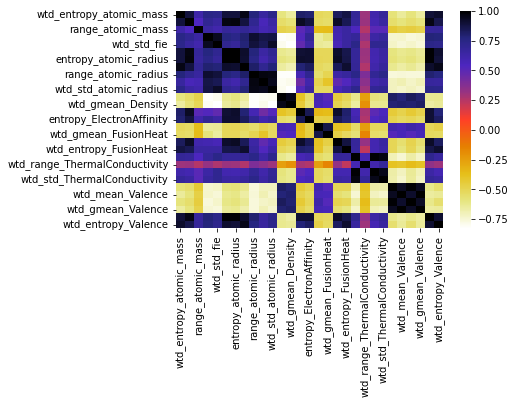

In [286]:
cor = data[required_columns].corr()
sns.heatmap(cor, cmap=plt.cm.CMRmap_r)

In [287]:
unwanted_features = []
for i in range(9):
    for j in range(9):
        if i != j:
            if corr_mat[i][j]>0.9:
                corr_1,_ = pearsonr(data[required_columns[i]],data["critical_temp"])
                corr_2,_ = pearsonr(data[required_columns[j]],data["critical_temp"])
                if corr_1>corr_2:
                    unwanted_features.append(required_columns[j])


print(len(unwanted_features))
print(set(unwanted_features))


8
{'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'entropy_fie', 'wtd_std_fie', 'range_fie', 'entropy_atomic_mass'}


In [288]:
required_columns = set(required_columns)
unwanted_features=set(unwanted_features)
final_cols = required_columns-unwanted_features
print(final_cols)
print(len(final_cols))


{'range_ThermalConductivity', 'gmean_FusionHeat', 'wtd_entropy_atomic_mass', 'wtd_gmean_Density', 'entropy_Density', 'entropy_Valence', 'std_atomic_radius', 'entropy_FusionHeat', 'wtd_mean_Valence', 'wtd_entropy_Valence', 'range_atomic_mass', 'wtd_std_atomic_radius', 'gmean_Valence', 'wtd_range_ThermalConductivity', 'std_ThermalConductivity', 'mean_Valence', 'gmean_Density', 'wtd_entropy_FusionHeat', 'range_atomic_radius', 'wtd_std_ThermalConductivity', 'wtd_gmean_FusionHeat', 'wtd_gmean_Valence', 'entropy_ElectronAffinity'}
23


In [289]:
# Fitting the Linear Regression model 
# x = data[final_cols]
x = data[required_columns]
y = data["critical_temp"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
# %%
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR_CT=LR.fit(x_train,y_train)
y_predict=LR_CT.predict(x_test)
print(y_predict)

[68.61335666 74.80319163 13.33126113 ... 28.64479547 11.03937267
 73.6269703 ]


In [290]:
LR.coef_

array([ 1.40909779e+02, -3.99253192e-02,  5.26159143e+01,  3.38790567e-03,
       -1.12221039e+00,  1.37563471e+01, -4.30554188e+01, -3.34697508e+01,
       -3.01088743e+01,  2.77328817e-01,  1.78672201e+01,  1.70218830e+01,
        4.60078437e-01,  1.35420784e-01, -2.83498699e+01, -2.13337988e+01,
       -1.20523583e-01, -3.28030732e-01, -2.09304822e+01, -5.05070989e+01,
        1.53243525e-02, -5.19269945e-02, -4.72008743e-02, -1.59267405e+01,
        3.95539927e-02, -3.59635939e-03, -4.07010728e+01,  3.56691469e-01,
        3.03395810e+01])

In [291]:
LR.intercept_

19.360293974158047

In [292]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.6663442152116457

In [293]:
# RMSE Computation
rmse = np.sqrt(MSE(y_test, y_predict))
print("RMSE : % f" %(rmse))

RMSE :  19.808163


Text(0.5, 1.0, 'Actual vs. Predicted')

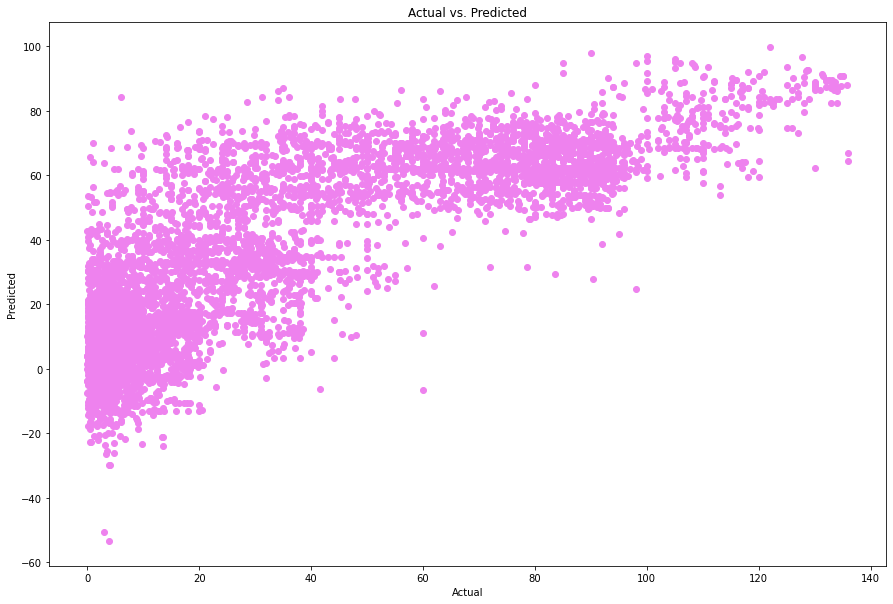

In [294]:
import matplotlib.pyplot as plot
plot.figure(figsize=(15,10))
plot.scatter(y_test,y_predict,color="violet")
plot.xlabel('Actual')
plot.ylabel('Predicted')
plot.title('Actual vs. Predicted')

In [295]:
print(required_columns)
# print(final_cols)

{'entropy_fie', 'range_ThermalConductivity', 'wtd_entropy_atomic_mass', 'wtd_gmean_Density', 'std_atomic_radius', 'entropy_FusionHeat', 'entropy_atomic_radius', 'wtd_mean_Valence', 'wtd_entropy_Valence', 'wtd_std_atomic_radius', 'gmean_Valence', 'wtd_entropy_FusionHeat', 'range_atomic_radius', 'wtd_gmean_FusionHeat', 'entropy_ElectronAffinity', 'wtd_entropy_atomic_radius', 'wtd_std_fie', 'gmean_FusionHeat', 'entropy_Density', 'entropy_Valence', 'range_atomic_mass', 'wtd_range_ThermalConductivity', 'std_ThermalConductivity', 'mean_Valence', 'range_fie', 'gmean_Density', 'entropy_atomic_mass', 'wtd_std_ThermalConductivity', 'wtd_gmean_Valence'}


In [296]:
print(final_cols)

{'range_ThermalConductivity', 'gmean_FusionHeat', 'wtd_entropy_atomic_mass', 'wtd_gmean_Density', 'entropy_Density', 'entropy_Valence', 'std_atomic_radius', 'entropy_FusionHeat', 'wtd_mean_Valence', 'wtd_entropy_Valence', 'range_atomic_mass', 'wtd_std_atomic_radius', 'gmean_Valence', 'wtd_range_ThermalConductivity', 'std_ThermalConductivity', 'mean_Valence', 'gmean_Density', 'wtd_entropy_FusionHeat', 'range_atomic_radius', 'wtd_std_ThermalConductivity', 'wtd_gmean_FusionHeat', 'wtd_gmean_Valence', 'entropy_ElectronAffinity'}


In [297]:
# Fitting the Linear Regression model 
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LassoCV,RidgeCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, StackingRegressor
import xgboost as xgb
# import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

x = data[final_cols]
y = data["critical_temp"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
# model=RandomForestRegressor()
model = LinearRegression()
model=model.fit(x_train,y_train)
y_predict=model.predict(x_test)
r2_score(y_test,y_predict)

0.6518514493741102

In [298]:
#Fitting the xgbooost model
import xgboost as xgb
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
model1=xgb.XGBRegressor()
model1=model1.fit(x_train,y_train)
y_predict=model1.predict(x_test)
r2_score(y_test,y_predict)


0.9058005142462524

Text(0.5, 1.0, 'Actual vs. Predicted')

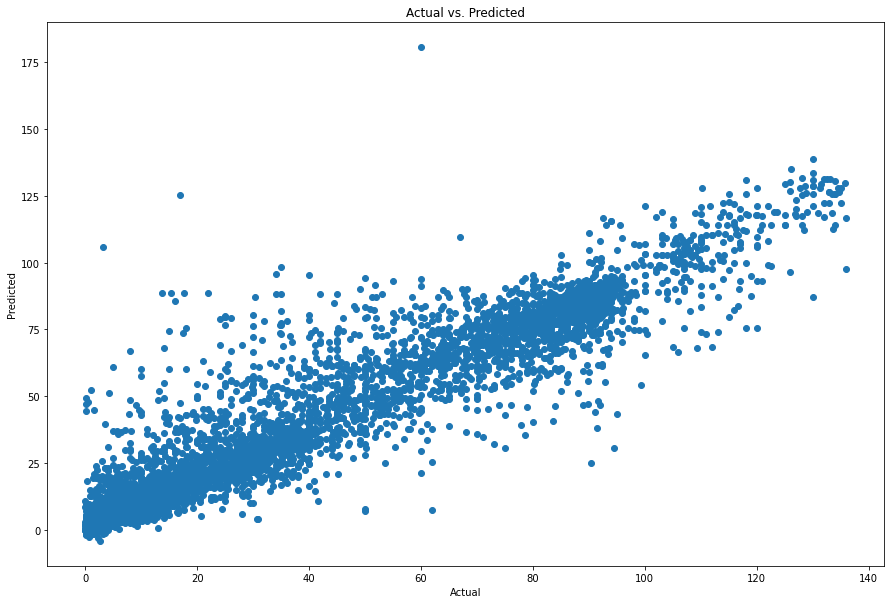

In [299]:
import matplotlib.pyplot as plot
plot.figure(figsize=(15,10))
plot.scatter(y_test,y_predict)
plot.xlabel('Actual')
plot.ylabel('Predicted')
plot.title('Actual vs. Predicted')

In [300]:
# RMSE Computation
rmse1 = np.sqrt(MSE(y_test, y_predict))
print("RMSE : % f" %(rmse1))

RMSE :  10.524928


In [301]:
# Fitting the RandomForest model
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2=model2.fit(x_train,y_train)
y_predict=model2.predict(x_test)
r2_score(y_test,y_predict)

0.9144404348450321

Text(0.5, 1.0, 'Actual vs. Predicted')

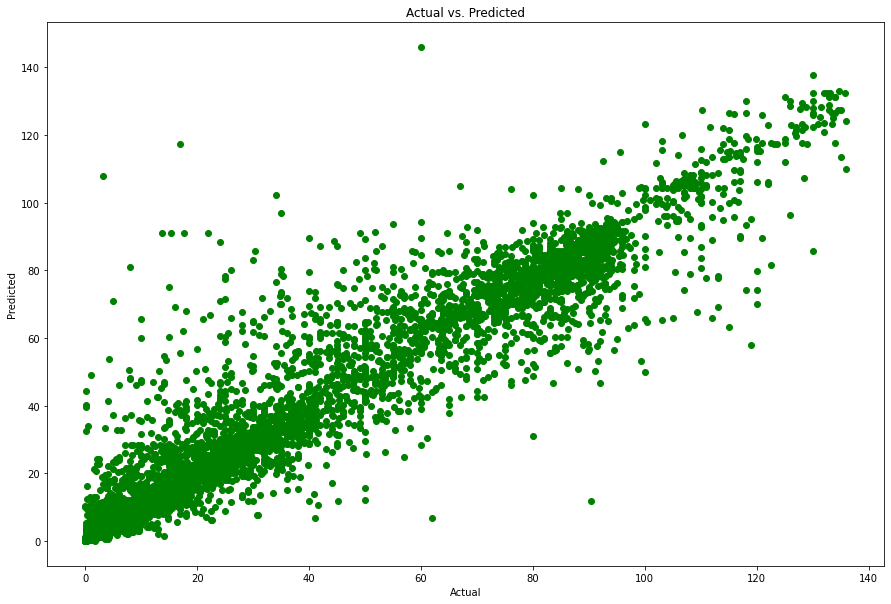

In [302]:
import matplotlib.pyplot as plot
plot.figure(figsize=(15,10))
plot.scatter(y_test,y_predict,color="green")
plot.xlabel('Actual')
plot.ylabel('Predicted')
plot.title('Actual vs. Predicted')

In [303]:
# RMSE Computation
rmse2 = np.sqrt(MSE(y_test, y_predict))
print("RMSE : % f" %(rmse2))

RMSE :  10.030652
